In [2]:
import pandas as pd
import numpy as np

In [134]:
data_set = pd.read_excel("일단_data_set.xlsx")

In [135]:
data_set.dtypes

movieNm                    object
openDt             datetime64[ns]
total_money                 int64
audience                    int64
screen_num                  int64
show_num                    int64
배급사                        object
movieCd                    object
director                   object
prdtYear                    int64
typeNm                     object
repNationNm                object
repGenreNm                 object
showTm                    float64
watchGradeNm               object
actor_1                    object
actor_2                    object
actor_3                    object
companyNm                  object
star_score                float64
star_user_count             int64
netizen_score             float64
netizen_count               int64
dtype: object

In [136]:
data_set = data_set[data_set['audience'] >= 10000]

In [137]:
data_set.rename(columns = {'배급사' : 'distributor'}, inplace = True)

In [138]:
data_set["openDt"] = data_set["openDt"].apply(lambda x: str(x)[5:7])

In [139]:
def month_change(i):
    if i == "01":
        return 'jan'
    elif i == '02':
        return 'feb'
    elif i == '03':
        return 'mar'
    elif i == '04':
        return 'apr'
    elif i == '05':
        return 'may'
    elif i == '06':
        return 'jun'
    elif i == '07':
        return 'jul'
    elif i == '08':
        return 'aug'
    elif i == '09':
        return 'sep'
    elif i == '10':
        return 'oct'
    elif i == '11':
        return 'nov'
    else:
        return 'dec'
data_set["openDt"] = data_set["openDt"].apply(month_change)

In [140]:
def grade_change(i):
    if i == '연소자관람가' or i == "모든 관람객이 관람할 수 있는 등급" or i == '전체관람가':
        return 'G'
    elif i == '12세관람가' or i == '12세이상관람가' or i == '국민학생관람불가' or i == '연소자관람불가' or i == '중학생이상관람가' or i == 'nan':
        return 'PG_13'
    elif i == '15세관람가' or i == '15세이상관람가' or i == '15세 미만인 자는 관람할 수 없는 등급 ' or i == '고등학생이상관람가':
        return 'R'
    elif i == '18세관람가' or i == '청소년관람불가':
        return 'NC_17'
    else:
        return i
data_set["watchGradeNm"] = data_set["watchGradeNm"].apply(grade_change)

In [141]:
def time_change(i):
    if i < 90:
        return 'under_90'
    elif i >= 90 and i < 120:
        return '90_120'
    elif i >=120 and i < 150:
        return '120_150'
    else:
        return '150_up'

data_set["showTm"] = data_set["showTm"].apply(time_change)

In [142]:
def nation_change(i):
    if i == '중국' or i == '홍콩' or i == '대만':
        return 'china'
    elif i == '아이슬란드' or i == '우크라이나' or i == '체코' or i == '노르웨이' or i == ' 오스트리아' or i == '덴마크' or i == '러시아' or i == '이탈리아' or i == '벨기에' or i == '네덜란드' or i == '스페인' or i == '핀란드' or i == '스웨덴' or i == '스위스' or i == '영국' or i == '프랑스' or i == '헝가리' or i == '독일' or i == '아일랜드':
        return 'europe'
    elif i == '태국' or i == '싱가포르' or i == '호주' or i == '캐나다' or i == '페루' or i == '멕시코' or i == '이스라엘' or i == '뉴질랜드' or i == '아르헨티나' or i == '이란' or i == '남아프리카공화국' or i == '인도네시아' or i == '인도':
        return 'other_nation'
    elif i == '한국':
        return 'korea'
    elif i == '미국':
        return 'america'
    elif i == '일본':
        return 'japan'
data_set["repNationNm"] = data_set["repNationNm"].apply(nation_change)

In [143]:
def genre_change(i):
    if i == '드라마' or i == '멜로/로맨스':
        return 'drama_romance'
    elif i == '전쟁' or i == '액션':
        return 'war_action'
    elif i == '공포(호러)' or i == '미스터리':
        return 'horror_mystery'
    elif i == '범죄' or i == '스릴러':
        return 'crime_thriller'
    elif i == 'SF' or i == '판타지' or i == '어드벤처':
        return 'SF_fantasy_adventure'
    elif i == '애니메이션' or i == '가족':
        return 'family_animation'
    elif i == '코미디':
        return 'comedy'
    elif i == '다큐멘터리':
        return 'documentary'
    elif i == '공연' or i == '뮤지컬':
        return 'performance_musical'
    elif i == '사극' or i == '서부극(웨스턴)':
        return 'historical'
    else:
        return i
    
data_set["repGenreNm"] = data_set["repGenreNm"].apply(genre_change)

In [144]:
def company_change(i):
    if i == '소니픽쳐스릴리징월트디즈니스튜디오스코리아(주)' or i == '월트디즈니' or i == '월트디즈니컴퍼니코리아(주)' or i == '월트디즈니코리아㈜':
        return 'walt_disney'
    elif i == '이십세기폭스코리아(주)':
        return 'twentieth_century_fox'
    elif i == '씨제이이앤엠(주)':
        return 'cjenm'
    elif i == '(주)쇼박스':
        return 'showbox'
    elif i == '워너 브러더스 픽쳐스' or i == '워너브러더스 코리아(주)':
        return 'warnerbros'
    elif i == '㈜메가박스' or i == '메가박스(주)플러스엠':
        return 'megabox'
    elif i == '유니버셜 픽쳐스' or i == '유니버설픽쳐스인터내셔널 코리아(유)':
        return 'universal'
    elif i == '(주)넥스트엔터테인먼트월드(NEW)':
        return 'next'
    elif i == '(주)와우픽쳐스':
        return 'wowpictures'
    elif i == '롯데쇼핑㈜롯데엔터테인먼트':
        return 'lotte'
    else:
        return 'other_company'
data_set["companyNm"] = data_set["companyNm"].apply(company_change)

In [145]:
cate_set = data_set[['movieCd', 'director', 'openDt', 'prdtYear', 'repNationNm', 'repGenreNm', 'showTm', 'watchGradeNm', 'actor_1', 'actor_2', 'actor_3', 'companyNm','audience','star_score','star_user_count','netizen_score','netizen_count']]

In [146]:
def score_change(i):
    if i < 1000000:
        return 1
    elif i < 2000000 and i >= 1000000:
        return 2
    elif i < 3000000 and i >= 2000000:
        return 3
    elif i < 4000000 and i >= 3000000:
        return 4
    elif i < 5000000 and i >= 4000000:
        return 5
    elif i < 6000000 and i >= 5000000:
        return 6
    elif i < 7000000 and i >= 6000000:
        return 7
    elif i < 8000000 and i >= 7000000:
        return 8
    elif i < 9000000 and i >= 8000000:
        return 9
    else:
        return 10
    
    
cate_set["audience"] = cate_set["audience"].apply(score_change)

<ipython-input-146-8294c83a562f>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cate_set["audience"] = cate_set["audience"].apply(score_change)


In [147]:
cate_set

,movieCd,director,openDt,prdtYear,repNationNm,repGenreNm,showTm,watchGradeNm,actor_1,actor_2,actor_3,companyNm,audience,star_score,star_user_count,netizen_score,netizen_count
0,20162869,장훈,aug,2017,korea,drama_romance,120_150,R,이수민,송강호,토마스 크레취만,other_company,10,9.2,18929,9.0,49617
1,20150976,김용화,dec,2017,korea,SF_fantasy_adventure,120_150,PG_13,하정우,차태현,주지훈,other_company,9,8.7,26302,7.8,57870
2,20151228,김성훈,jan,2016,korea,war_action,120_150,R,이재남,현빈,유해진,other_company,8,8.8,14090,8.2,25212
3,20167303,존 왓츠,jul,2017,america,war_action,120_150,PG_13,제이콥 배덜런,톰 홀랜드,로버트 다우니 주니어,other_company,8,8.8,9933,8.3,18792
4,20172742,강윤성,oct,2017,korea,crime_thriller,120_150,NC_17,마동석,윤계상,조재윤,other_company,7,9.2,11928,9.1,29016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3879,20101283,무라타 마사히코,dec,2010,japan,family_animation,under_90,G,이노우에 카즈히코,모리카와 토시유키,나카무라 치에,other_company,1,0.0,0,8.1,216
3880,20100775,미키 타카히로,aug,2010,japan,drama_romance,120_150,PG_13,코라 켄고,미야자키 아오이,NaN,other_company,1,0.0,0,8.4,335
3881,20100011,토마스 보르히 닐슨,feb,2008,europe,family_animation,under_90,G,엄상현,이장원,조현정,other_company,1,0.0,0,7.5,42
3882,20100277,김호준,may,2010,korea,comedy,90_120,R,박해미,이태성,신이,other_company,1,0.0,0,4.9,92


In [192]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [193]:
con_data = cate_set.groupby(['companyNm'], as_index=False).mean()

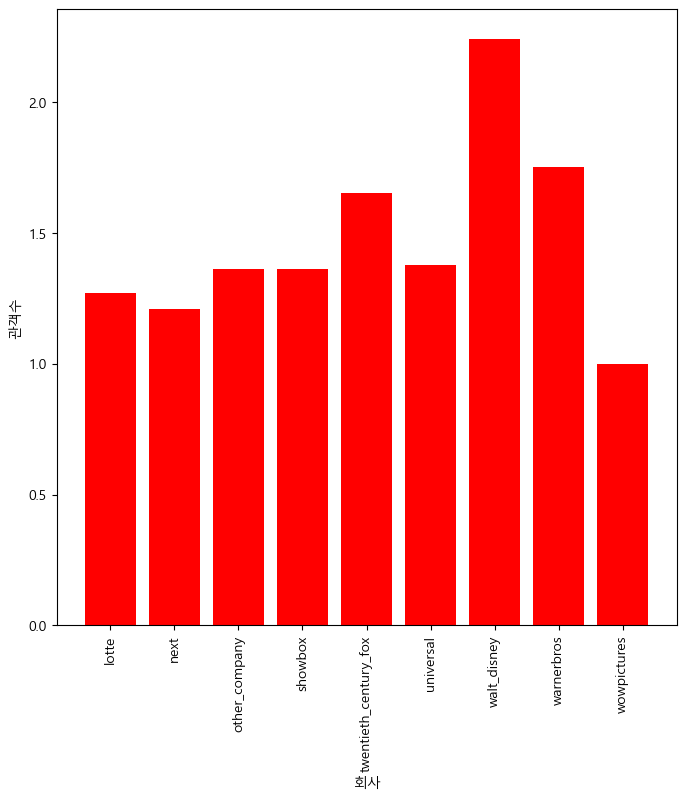

In [197]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8,8])
plt.bar(con_data['companyNm'], con_data['audience'], color='red')
plt.xticks(rotation=90)
plt.xlabel('회사', fontsize=10)
plt.ylabel('관객수', fontsize=10)
plt.show()

In [148]:
d1 = cate_set[["director","audience"]]
o1 = cate_set[["openDt","audience"]]
p1 = cate_set[["prdtYear","audience"]]
n1 = cate_set[["repNationNm","audience"]]
g1 = cate_set[["repGenreNm","audience"]]
s1 = cate_set[["showTm","audience"]]
w1 = cate_set[["watchGradeNm","audience"]]
c1 = cate_set[["companyNm","audience"]]

In [149]:
d2 = d1.groupby("director").agg({"audience": np.mean})
o2 = o1.groupby("openDt").agg({"audience": np.mean})
p2 = p1.groupby("prdtYear").agg({"audience": np.mean})
n2 = n1.groupby("repNationNm").agg({"audience": np.mean})
g2 = g1.groupby("repGenreNm").agg({"audience": np.mean})
s2 = s1.groupby("showTm").agg({"audience": np.mean})
w2 = w1.groupby("watchGradeNm").agg({"audience": np.mean})
c2 = c1.groupby("companyNm").agg({"audience": np.mean})

In [150]:
d2 = d2.reset_index()
o2 = o2.reset_index()
p2 = p2.reset_index()
n2 = n2.reset_index()
g2 = g2.reset_index()
s2 = s2.reset_index()
w2 = w2.reset_index()
c2 = c2.reset_index()

In [151]:
d3 = cate_set.merge(d2,how='inner',on='director')
o3 = cate_set.merge(o2,how='inner',on='openDt')
p3 = cate_set.merge(p2,how='inner',on='prdtYear')
n3 = cate_set.merge(n2,how='inner',on='repNationNm')
g3 = cate_set.merge(g2,how='inner',on='repGenreNm')
s3 = cate_set.merge(s2,how='inner',on='showTm')
w3 = cate_set.merge(w2,how='inner',on='watchGradeNm')
c3 = cate_set.merge(c2,how='inner',on='companyNm')

In [152]:
d3 = d3.rename(columns={"audience_y":"director_score"})
o3 = o3.rename(columns={"audience_y":"openDt_score"})
p3 = p3.rename(columns={"audience_y":"prdtYear_score"})
n3 = n3.rename(columns={"audience_y":"repNationNm_score"})
g3 = g3.rename(columns={"audience_y":"repGenreNm_score"})
s3 = s3.rename(columns={"audience_y":"showTm_score"})
w3 = w3.rename(columns={"audience_y":"watchGradeNm_score"})
c3 = c3.rename(columns={"audience_y":"companyNm_score"})

In [153]:
d3 = d3[["movieCd","director_score"]]
o3 = o3[["movieCd","openDt_score"]]
p3 = p3[["movieCd","prdtYear_score"]]
n3 = n3[["movieCd","repNationNm_score"]]
g3 = g3[["movieCd","repGenreNm_score"]]
s3 = s3[["movieCd","showTm_score"]]
w3 = w3[["movieCd","watchGradeNm_score"]]
c3 = c3[["movieCd","companyNm_score"]]

In [154]:
a11 = cate_set[["movieCd","actor_1","audience"]]
a12 = cate_set[["movieCd","actor_2","audience"]]
a13 = cate_set[["movieCd","actor_3","audience"]]

In [155]:
a21 = a11.groupby("actor_1").agg({"audience": np.mean})
a22 = a12.groupby("actor_2").agg({"audience": np.mean})
a23 = a13.groupby("actor_3").agg({"audience": np.mean})

In [156]:
a21 = a21.reset_index()
a22 = a22.reset_index()
a23 = a23.reset_index()

In [157]:
a31 = cate_set.merge(a21,how='outer',on='actor_1')
a32 = cate_set.merge(a22,how='outer',on='actor_2')
a33 = cate_set.merge(a23,how='outer',on='actor_3')

In [158]:
a31 = a31.rename(columns = {"actor_1":"actor"})
a32 = a32.rename(columns = {"actor_2":"actor"})
a33 = a33.rename(columns = {"actor_3":"actor"})

In [159]:
a41 = a31[["actor","audience_y"]]
a42 = a32[["actor","audience_y"]]
a43 = a33[["actor","audience_y"]]

In [160]:
actor = pd.concat([a41,a42,a43])

In [161]:
actor = actor.groupby("actor").agg({"audience_y":np.mean})

In [162]:
actor = actor.reset_index()

In [163]:
a31 = a31[["movieCd","audience_y"]]
a32 = a32[["movieCd","audience_y"]]
a33 = a33[["movieCd","audience_y"]]

In [164]:
actor = a31.merge(a32,how="outer",on="movieCd")

In [165]:
actor = actor.merge(a33,how="outer",on="movieCd")

In [166]:
actor["actor_score"] = actor["audience_y"]+ actor["audience_y_x"] + actor["audience_y_y"]

In [167]:
actor = actor[["movieCd","actor_score"]]

In [168]:
actor = actor.fillna(0)

In [169]:
value_data_set = data_set.drop(['director', 'openDt', 'prdtYear', 'repNationNm', 'repGenreNm', 'showTm', 'watchGradeNm', 'actor_1', 'actor_2', 'actor_3', 'companyNm','audience'],axis=1)

In [170]:
dd_set = value_data_set.merge(d3,how="outer",on="movieCd")

In [171]:
dd_set = dd_set.merge(o3,how="outer",on="movieCd")

In [172]:
dd_set = dd_set.merge(p3,how="outer",on="movieCd")

In [173]:
dd_set = dd_set.merge(n3,how="outer",on="movieCd")

In [174]:
dd_set = dd_set.merge(g3,how="outer",on="movieCd")

In [175]:
dd_set = dd_set.merge(s3,how="outer",on="movieCd")

In [176]:
dd_set = dd_set.merge(w3,how="outer",on="movieCd")

In [177]:
dd_set = dd_set.merge(c3,how="outer",on="movieCd")

In [178]:
dd_set = dd_set.merge(actor,how="outer",on="movieCd")

In [179]:
dd_set["director_score"] = round(dd_set["director_score"],1)
dd_set["openDt_score"] = round(dd_set["openDt_score"],1)
dd_set["prdtYear_score"] = round(dd_set["prdtYear_score"],1)
dd_set["repNationNm_score"] = round(dd_set["repNationNm_score"],1)
dd_set["repGenreNm_score"] = round(dd_set["repGenreNm_score"],1)
dd_set["showTm_score"] = round(dd_set["showTm_score"],1)
dd_set["watchGradeNm_score"] = round(dd_set["watchGradeNm_score"],1)
dd_set["companyNm_score"] = round(dd_set["companyNm_score"],1)
dd_set["actor_score"] = round(dd_set["actor_score"],1)

In [180]:
dd_set = dd_set.drop(["movieCd","movieNm"],axis = 1)

In [181]:
dd_set = dd_set.fillna(0)

In [182]:
dd_set

,total_money,screen_num,show_num,distributor,typeNm,star_score,star_user_count,netizen_score,netizen_count,director_score,openDt_score,prdtYear_score,repNationNm_score,repGenreNm_score,showTm_score,watchGradeNm_score,companyNm_score,actor_score
0,95853645649,1906,184075,(주)쇼박스,장편,9.2,18929,9.0,49617,6.5,1.4,1.5,1.7,1.3,2.0,1.4,1.4,30.0
1,68350496432,1912,91301,롯데쇼핑㈜롯데엔터테인먼트,장편,8.7,26302,7.8,57870,7.5,1.3,1.5,1.7,1.6,2.0,1.7,1.4,17.7
2,63783051326,1392,142989,(주)씨제이이엔엠,장편,8.8,14090,8.2,25212,3.8,1.4,1.4,1.7,2.0,2.0,1.4,1.4,22.3
3,59125813820,1965,164448,소니픽쳐스엔터테인먼트코리아주식회사극장배급지점,장편,8.8,9933,8.3,18792,8.5,1.8,1.5,1.5,2.0,2.0,1.7,1.4,24.0
4,56318014149,1315,149334,"메가박스중앙(주)플러스엠,(주)키위미디어그룹",장편,9.2,11928,9.1,29016,4.5,1.3,1.5,1.7,1.6,2.0,1.3,1.4,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2636,75017000,58,985,애니박스 엔터테인먼트,장편,0.0,0,8.1,216,1.0,1.3,1.3,1.0,1.1,1.1,1.1,1.4,3.0
2637,81223000,13,578,(주)스폰지이엔티,장편,0.0,0,8.4,335,1.0,1.4,1.3,1.0,1.3,2.0,1.7,1.4,0.0
2638,72851000,47,718,에이원엔터테인먼트,장편,0.0,0,7.5,42,1.0,1.3,1.2,1.0,1.1,1.1,1.1,1.4,3.0
2639,73108500,99,2013,(주)새인컴퍼니,장편,0.0,0,4.9,92,1.0,1.5,1.3,1.7,1.4,1.3,1.4,1.4,3.0


In [183]:
dd_set.to_excel("일단_value_data.xlsx",index=False)